# Đọc, xử lý Data

In [1]:
!gdown --id 1Shar4McQceWGtmjAZ3iMsF5NoC8kg8Wf

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Shar4McQceWGtmjAZ3iMsF5NoC8kg8Wf
From (redirected): https://drive.google.com/uc?id=1Shar4McQceWGtmjAZ3iMsF5NoC8kg8Wf&confirm=t&uuid=14d30ba0-4809-4090-a9c5-004f0fa2c46b
To: /content/archive.zip
100% 455M/455M [00:05<00:00, 84.8MB/s]


In [2]:
!unzip '/content/archive.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Training Data/Training Data/Tiger/Tiger (2000).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2001).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2002).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2003).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2004).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2005).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2006).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2007).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2008).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2009).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2010).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2011).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2012).jpeg  
  inflating: Training Data/Training Data/Tiger/Tiger (2013).jpeg  
  inf

In [3]:
import os
import numpy as np
import torch
import torch.optim as optim

import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torchvision.transforms import Resize

if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')

In [4]:
classes=os.listdir('/content/Validation Data/Validation Data')
print(classes)
n_classes=len(classes)
print(n_classes)

['Tiger', 'Zebra', 'Butterfly', 'Cat', 'Panda', 'Monkey', 'Hippo', 'Lizard', 'Gorilla', 'Dog', 'Cow', 'Spider', 'Elephant', 'Mouse', 'Beetle']
15


In [5]:
cls2idx={classes[i]:i for i in range(n_classes)}
idx2cls={i:classes[i] for i in range(n_classes)}
print(cls2idx)
print(idx2cls)

{'Tiger': 0, 'Zebra': 1, 'Butterfly': 2, 'Cat': 3, 'Panda': 4, 'Monkey': 5, 'Hippo': 6, 'Lizard': 7, 'Gorilla': 8, 'Dog': 9, 'Cow': 10, 'Spider': 11, 'Elephant': 12, 'Mouse': 13, 'Beetle': 14}
{0: 'Tiger', 1: 'Zebra', 2: 'Butterfly', 3: 'Cat', 4: 'Panda', 5: 'Monkey', 6: 'Hippo', 7: 'Lizard', 8: 'Gorilla', 9: 'Dog', 10: 'Cow', 11: 'Spider', 12: 'Elephant', 13: 'Mouse', 14: 'Beetle'}


In [36]:
class ImageDataset(Dataset):
  def __init__(self,root_dir, cls2idx,transform, norm=None):
    self.root_dir=root_dir
    self.norm=norm
    self.cls2idx=cls2idx
    self.transform=transform # Store the transform
    self.paths, self.labels = self.read_img()

  def read_img(self):
    paths=[]
    labels=[]

    for cls in cls2idx.keys():
      cls_path=os.path.join(self.root_dir,cls)
      for img in os.listdir(cls_path):
        img_path=os.path.join(cls_path,img)
        paths.append(img_path)
        labels.append(cls2idx[cls])
    return paths, labels

  def __len__(self):
    return len(self.paths)

  def __getitem__(self,idx):
    img_path=self.paths[idx]
    label=self.labels[idx]

    img=read_image(img_path)
    img=self.transform(img) # Apply transform here
    img=img.type(torch.float32)

    if img.shape[0]==1:
      img=img.repeat(3,1,1)
    elif img.shape[0]==4:
      img=img[:3]
    if self.norm:
      img/=255
    return img, label

In [37]:
train_dir='/content/Training Data/Training Data'
test_dir='/content/Testing Data/Testing Data'
val_dir='/content/Validation Data/Validation Data'

transforms_img=transforms.Compose([
    Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(5),
    transforms.RandomErasing(p=0.75,
                             scale=(0.01, 0.3),
                             ratio=(1.0, 1.0),
                             value=0,
                             inplace =True)
])

train_set=ImageDataset(train_dir,cls2idx,transforms_img, norm=True)
test_set=ImageDataset(test_dir,cls2idx,transforms_img, norm=True)
val_set=ImageDataset(val_dir,cls2idx,transforms_img, norm=True)

print(len(train_set))
print(len(test_set))
print(len(val_set))

30000
2407
2000


In [38]:
train_loader=DataLoader(train_set, batch_size=256, shuffle=True)
test_loader=DataLoader(test_set, batch_size=64, shuffle=False)
val_loader=DataLoader(val_set, batch_size=64, shuffle=False)

In [39]:
for x, y in train_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([256, 3, 224, 224])
torch.Size([256])


In [60]:
from collections import Counter

counts = Counter(train_set.labels)   # đếm theo index class
for idx, cnt in counts.items():
    print(f"{idx2cls[idx]}: {cnt}")

Tiger: 2000
Zebra: 2000
Butterfly: 2000
Cat: 2000
Panda: 2000
Monkey: 2000
Hippo: 2000
Lizard: 2000
Gorilla: 2000
Dog: 2000
Cow: 2000
Spider: 2000
Elephant: 2000
Mouse: 2000
Beetle: 2000


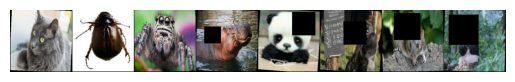

In [10]:
from torchvision.utils import make_grid

def show_img(img):
  img=img.numpy()
  img=img.transpose((1,2,0))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

for img, label in train_loader:
  show_img(make_grid(img[0:8]))
  break

# Model Resnet

In [11]:
class ResidualBlock(nn.Module):
  def __init__(self, in_channels, out_channels, stride=1):
    super(ResidualBlock, self).__init__()
    self.conv1=nn.Sequential(nn.Conv2d(in_channels,
                                        out_channels,
                                        kernel_size=3,
                                        stride=stride,
                                        padding=1))

    self.batchnorm1=nn.BatchNorm2d(out_channels)

    self.conv2=nn.Sequential(nn.Conv2d(out_channels,
                                        out_channels,
                                        kernel_size=3,
                                        stride=1,
                                        padding=1))

    self.batchnorm2=nn.BatchNorm2d(out_channels)

    self.downsample = nn.Sequential()

    if stride != 1 or in_channels != out_channels :
      self.downsample=nn.Sequential(nn.Conv2d(in_channels,
                                              out_channels,
                                              kernel_size=1,
                                              stride=stride),
                                    nn.BatchNorm2d(out_channels))
    self.relu=nn.ReLU()

  def forward(self, x):

    shortcut=x.clone()

    x=self.conv1(x)
    x=self.batchnorm1(x)
    x=self.relu(x)

    x=self.conv2(x)
    x=self.batchnorm2(x)
    x+=self.downsample(shortcut)
    x=self.relu(x)

    return x

In [12]:
def create_layer(ResidualBlock, in_channels, out_channels, n_blocks, stride=1):
  blocks=[]
  first_layer=ResidualBlock(in_channels,
                              out_channels,
                              stride)
  blocks.append(first_layer)

  for i in range(n_blocks):
    block=ResidualBlock(out_channels, out_channels,
                          stride=1)
    blocks.append(block)
  block_sequential=nn.Sequential(*blocks)
  return block_sequential


In [13]:
class ResNet(nn.Module):
  def __init__(self, ResidualBlock, n_blocks,  n_classes):
    super(ResNet, self).__init__()
    self.conv1=nn.Conv2d(3,64,7,stride=2, padding=3)
    self.maxpool=nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    self.relu=nn.ReLU()
    self.bn=nn.BatchNorm2d(64)

    self.conv2=create_layer(ResidualBlock, 64,64, n_blocks[0], stride=1)
    self.conv3=create_layer(ResidualBlock, 64,128, n_blocks[1], stride=2)
    self.conv4=create_layer(ResidualBlock, 128,256, n_blocks[2], stride=2)
    self.conv5=create_layer(ResidualBlock, 256,512, n_blocks[3], stride=2)

    self.avgpool=nn.AdaptiveAvgPool2d(1)
    self.flatten=nn.Flatten()
    self.linear=nn.Linear(512,n_classes)

  def forward(self, x):

    x=self.conv1(x)
    x=self.bn(x)
    x=self.relu(x)
    x=self.maxpool(x)

    x=self.conv2(x)
    x=self.conv3(x)
    x=self.conv4(x)
    x=self.conv5(x)

    x=self.avgpool(x)
    x=self.flatten(x)
    x=self.linear(x)

    return x


In [14]:
n_classes=len(classes)

model=ResNet(ResidualBlock, # Pass the class, not an instance
             n_blocks=[2,2,2,2],
             n_classes=n_classes).to(device)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=1e-3)
decayRate = 0.96
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decayRate)

In [15]:
def Evaluate(model, val_loader):
  with torch.no_grad():
      model.eval()
      total_val=0
      loss_val=0
      correct_val=0

      for inp, out in val_loader:
        inp, out= inp.to(device), out.to(device)

        pred=model(inp)
        loss_val+=criterion(pred.float(), out).item() # Cast pred to float

        pred=torch.argmax(pred, dim=1)
        correct_val+=(pred==out).sum().item()

        total_val+=out.size(0)

      losses_val.append(loss_val/len(val_loader))
      accuracy_val.append(correct_val/total_val)

      print('--- loss_val = ', loss_val/len(val_loader) , '--- accuracy val = ', correct_val/total_val)
      return losses_val, accuracy_val

In [16]:
epoch_max=20

losses_train=[]
accuracy_train=[]

losses_val=[]
accuracy_val=[]

for epoch in range(epoch_max):
  total_train=0
  loss_train=0
  loss_val=0

  correct=0
  print('epoch = [', epoch+1 , '/',epoch_max,']')
  for img, label in train_loader:
    model.train()

    img, label= img.to(device), label.to(device)

    predict=model(img)

    optimizer.zero_grad()
    loss=criterion(predict, label)
    loss.backward()
    optimizer.step()

    loss_train+=loss.item()
    total_train+=label.size(0)

    with torch.no_grad():
      model.eval()
      predict=torch.argmax(predict, dim=1)
      correct+=(predict==label).sum().item()

  loss_epoch=loss_train/len(train_loader)
  losses_train.append(loss_epoch)

  accuracy_train.append(correct/total_train)

  print('--- loss_train = ', loss_epoch, '--- accuracy train = ', correct/total_train)

  a,b = Evaluate(model, val_loader)

  losses_val.append(a)
  accuracy_val.append(b)

epoch = [ 1 / 20 ]
--- loss_train =  2.1405048925997847 --- accuracy train =  0.2981333333333333
--- loss_val =  2.4593002814799547 --- accuracy val =  0.244
epoch = [ 2 / 20 ]
--- loss_train =  1.6916866544949807 --- accuracy train =  0.4469666666666667
--- loss_val =  2.0298596657812595 --- accuracy val =  0.326
epoch = [ 3 / 20 ]
--- loss_train =  1.4329342246055603 --- accuracy train =  0.5360666666666667
--- loss_val =  2.036080600693822 --- accuracy val =  0.372
epoch = [ 4 / 20 ]
--- loss_train =  1.260049073372857 --- accuracy train =  0.5894
--- loss_val =  2.591091719456017 --- accuracy val =  0.3295
epoch = [ 5 / 20 ]
--- loss_train =  1.1292669813511735 --- accuracy train =  0.6335333333333333
--- loss_val =  1.9025649689137936 --- accuracy val =  0.4235
epoch = [ 6 / 20 ]
--- loss_train =  1.0236471593379974 --- accuracy train =  0.6688
--- loss_val =  1.4190330058336258 --- accuracy val =  0.5445
epoch = [ 7 / 20 ]
--- loss_train =  0.931298908540758 --- accuracy train = 

In [25]:
losses_val = [x for x in losses_val if isinstance(x, float)]
print(losses_val)
accuracy_val = [x for x in accuracy_val if isinstance(x, float)]
print(accuracy_val)

[2.4593002814799547, 2.0298596657812595, 2.036080600693822, 2.591091719456017, 1.9025649689137936, 1.4190330058336258, 1.9899834357202053, 2.1600921135395765, 1.276589410379529, 1.0861019911244512, 1.485265233553946, 1.0517444852739573, 1.2547845733352005, 1.6800329638645053, 0.9898347361013293, 1.1578925931826234, 1.268867066130042, 0.8338916534557939, 0.9323597047477961, 0.8502311455085874]
[0.244, 0.326, 0.372, 0.3295, 0.4235, 0.5445, 0.444, 0.4145, 0.6035, 0.6575, 0.558, 0.6675, 0.648, 0.5425, 0.7015, 0.6465, 0.603, 0.738, 0.7125, 0.738]


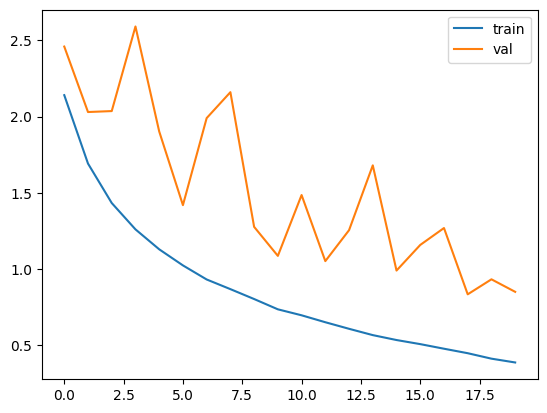

In [23]:
import matplotlib.pyplot as plt

plt.plot(losses_train, label='train')
plt.plot(losses_val, label='val')
plt.legend()
plt.show()

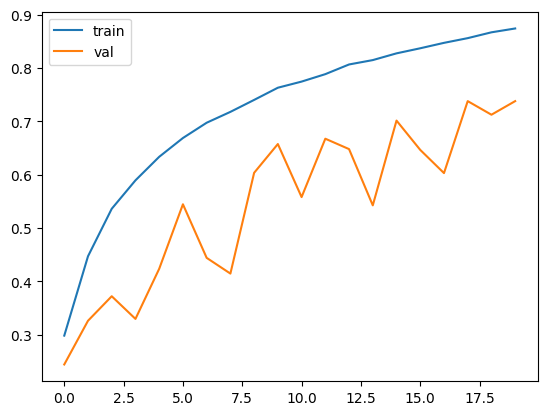

In [26]:
plt.plot(accuracy_train, label='train')
plt.plot(accuracy_val, label='val')
plt.legend()
plt.show()

In [40]:
with torch.no_grad():
    model.eval()
    total_test=0 # Changed to total_test for clarity
    loss_test_sum=0 # Changed to loss_test_sum for clarity
    correct_test=0 # Changed to correct_test for clarity

    for inp, out in test_loader:
      inp, out= inp.to(device), out.to(device)

      pred=model(inp)
      loss_test_sum+=criterion(pred.float(), out).item() # Cast pred to float

      pred=torch.argmax(pred, dim=1)
      correct_test+=(pred==out).sum().item()

      total_test+=out.size(0)

    # Removed appending to losses_val and accuracy_val as this is for testing
    print('--- Test Loss = ', loss_test_sum/len(test_loader) , '--- Test Accuracy = ', correct_test/total_test)

--- Test Loss =  1.0036745702749805 --- Test Accuracy =  0.7307852098047362


In [56]:
print(idx2cls)

{0: 'Tiger', 1: 'Zebra', 2: 'Butterfly', 3: 'Cat', 4: 'Panda', 5: 'Monkey', 6: 'Hippo', 7: 'Lizard', 8: 'Gorilla', 9: 'Dog', 10: 'Cow', 11: 'Spider', 12: 'Elephant', 13: 'Mouse', 14: 'Beetle'}


In [80]:
import torch.nn.functional as F

def test_model(dir):
    img = read_image(dir)
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

    # Xử lý số kênh
    if img.shape[0] == 1:      # grayscale
        img = img.repeat(3, 1, 1)
    elif img.shape[0] == 4:    # RGBA
        img = img[:3]

    # Chuẩn hóa
    img = img.type(torch.float32) / 255
    img = transforms_img(img)   # phải giống lúc train

    with torch.no_grad():
        model.eval()
        img = img.unsqueeze(0).to(device)

        logits = model(img)                  # đầu ra logits
        pred = torch.argmax(logits, dim=1)   # lấy nhãn dự đoán
        probs = F.softmax(logits, dim=1)     # xác suất cho mọi class
        conf = probs[0, pred.item()]         # xác suất của class đã argmax

        print(f"Dự đoán: {idx2cls[pred.item()]} --- Độ tin cậy: {conf.item()*100:.2f}%")


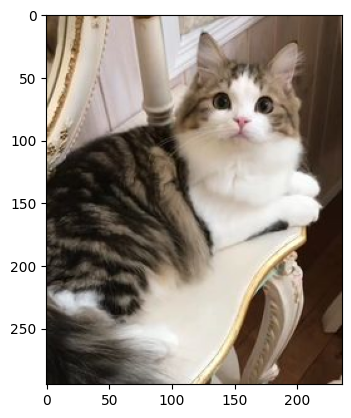

Dự đoán: Cat --- Độ tin cậy: 99.96%


In [83]:
dir='/content/db167f5639b20ed2857ddd862626e24e.jpg'
test_model(dir)

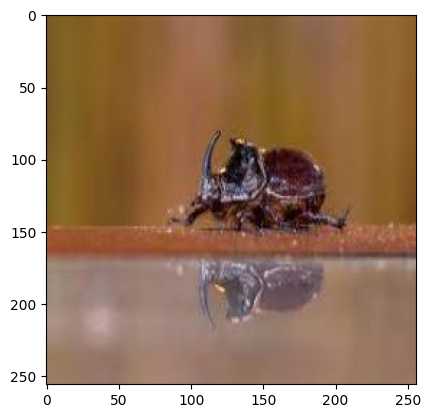

Dự đoán: Beetle --- Độ tin cậy: 79.20%


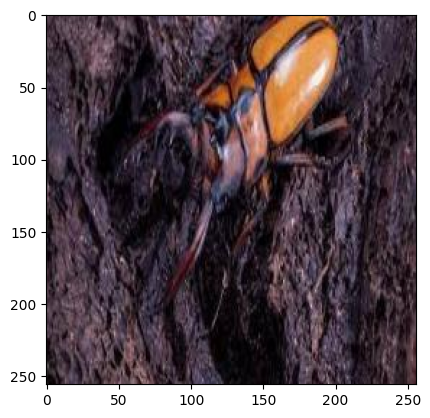

Dự đoán: Spider --- Độ tin cậy: 86.77%


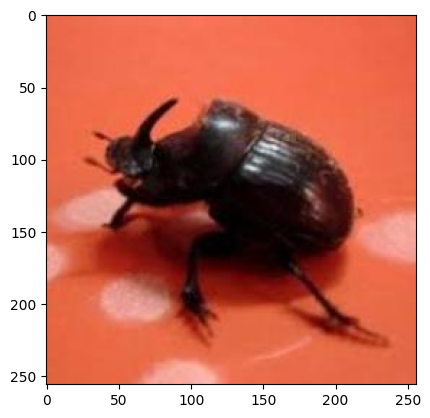

Dự đoán: Beetle --- Độ tin cậy: 99.33%


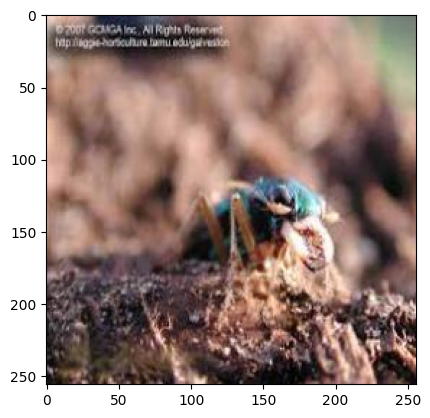

Dự đoán: Lizard --- Độ tin cậy: 48.82%


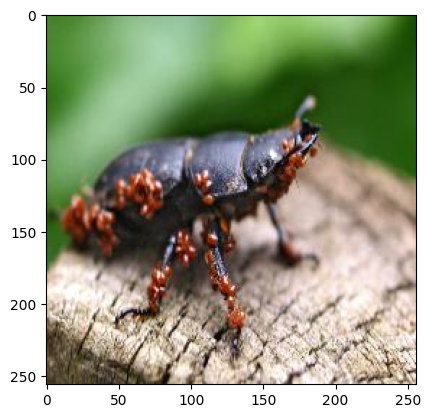

Dự đoán: Beetle --- Độ tin cậy: 99.98%


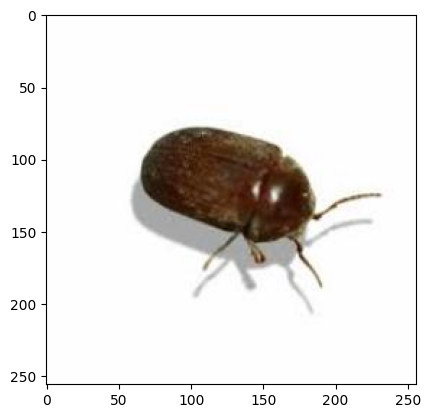

Dự đoán: Beetle --- Độ tin cậy: 99.94%


In [84]:
for i, path in enumerate(os.listdir('/content/Testing Data/Testing Data/Beetle')):
  dir=os.path.join('/content/Testing Data/Testing Data/Beetle',path)
  test_model(dir)

  if i==5:
    break

In [85]:
torch.save(model, "animal_model.pth")
